In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score

In [3]:
train_set=pd.read_csv("train.csv")
test_set=pd.read_csv("test.csv")

In [4]:
train_set.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Placed,M,76.76,Others,76.50,Others,Commerce,67.50,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15,350000.0
1,Placed,M,76.70,Central,89.70,Others,Commerce,66.00,Comm&Mgmt,Yes,90.00,Mkt&Fin,68.55,250000.0
2,Not Placed,M,62.00,Central,60.33,Others,Science,64.21,Sci&Tech,No,63.00,Mkt&HR,60.02,NaN
3,Placed,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,393000.0
4,Placed,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,650000.0


In [5]:
test_set.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,Not Placed,M,52.0,Others,55.0,Others,Commerce,56.3,Comm&Mgmt,No,59.0,Mkt&Fin,64.74,NaN
1,Not Placed,M,52.0,Central,57.0,Central,Commerce,50.8,Comm&Mgmt,No,67.0,Mkt&HR,62.79,NaN
2,Not Placed,M,52.0,Others,50.0,Others,Arts,61.0,Comm&Mgmt,No,60.0,Mkt&Fin,58.52,NaN
3,Not Placed,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,NaN
4,Not Placed,F,47.0,Central,55.0,Others,Science,65.0,Comm&Mgmt,No,62.0,Mkt&HR,65.04,NaN


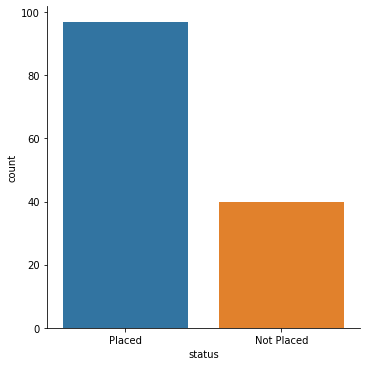

In [6]:
sns.catplot(x="status", kind="count", data=train_set)

Il numero di `Placed` è nettamente superiore ai `Not Placed`. Probabilmente il maggior numero di errori verrà fatto proprio su quest'ultimo valore

In [7]:
train_set.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,137.000000,137.000000,137.000000,137.000000,137.000000,97.000000
mean,67.681314,66.613139,66.284526,72.680219,62.223212,291474.226804
std,10.607830,11.658483,7.293686,13.778495,6.118332,98948.123275
min,40.890000,37.000000,52.000000,50.000000,51.210000,200000.000000
25%,61.000000,61.000000,61.000000,61.000000,57.550000,240000.000000
50%,67.900000,65.000000,66.000000,72.000000,61.580000,265000.000000
75%,75.200000,73.000000,71.000000,84.270000,66.230000,300000.000000
max,87.000000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
test_set.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,35.000000,35.000000,35.000000,35.000000,35.000000,20.000000
mean,65.045429,63.888000,65.333143,72.700286,62.245429,282350.000000
std,11.861296,10.687724,8.642086,11.825283,5.247802,69109.581177
min,43.000000,47.000000,50.000000,55.000000,53.290000,200000.000000
25%,56.140000,56.000000,58.895000,61.800000,58.380000,240000.000000
50%,63.000000,63.000000,65.000000,71.000000,62.480000,272500.000000
75%,71.500000,71.700000,71.000000,81.700000,66.055000,300000.000000
max,86.500000,90.000000,82.000000,93.400000,74.490000,500000.000000


Non sembrano esserci valori chiaramente errati, non verranno toccati

In [9]:
print(f"Lista di feature a disposizione: {list(train_set)}")

Lista di feature a disposizione: ['status', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary']


In [10]:
train_set.nunique()

status              2
gender              2
ssc_p              79
ssc_b               2
hsc_p              76
hsc_b               2
hsc_s               3
degree_p           64
degree_t            3
workex              2
etest_p            80
specialisation      2
mba_p             132
salary             38
dtype: int64

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          137 non-null    object 
 1   gender          137 non-null    object 
 2   ssc_p           137 non-null    float64
 3   ssc_b           137 non-null    object 
 4   hsc_p           137 non-null    float64
 5   hsc_b           137 non-null    object 
 6   hsc_s           137 non-null    object 
 7   degree_p        137 non-null    float64
 8   degree_t        137 non-null    object 
 9   workex          137 non-null    object 
 10  etest_p         137 non-null    float64
 11  specialisation  137 non-null    object 
 12  mba_p           137 non-null    float64
 13  salary          97 non-null     float64
dtypes: float64(6), object(8)
memory usage: 15.1+ KB


### Funzione per cancellare colonne, giusto per ricordarmi di toglierle da entrambi i dataset

In [12]:
def drop_clumns(datasets:list, columns):
    for dataset in datasets:
        dataset.drop(labels=columns, inplace=True, axis=1)

In [13]:
print(f"Valori null nel train_set: \n\n{train_set.isna().sum()}")

Valori null nel train_set: 

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            40
dtype: int64


In [14]:
print(f"Valori null nel test_set: \n\n{test_set.isna().sum()}")

Valori null nel test_set: 

status             0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            15
dtype: int64


`salary` contiene valori nulli in entrambi i set

In [15]:
temp_train = train_set.dropna()
temp_train.status.nunique()

1

Se cancellassi le righe corrispondenti ai salary nulli rimarrei con 1 valore in `status`, ovvero quello relativo ai soli studenti già assunti nel loro primo anno

<AxesSubplot:xlabel='status', ylabel='count'>

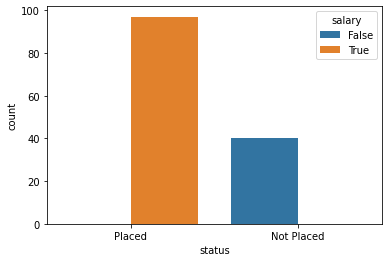

In [16]:
temp = train_set.copy()
temp = temp.fillna(0)
temp['salary'] = temp['salary'].apply(lambda x: False if x <= 0 else True)
p = sns.countplot(x="status", hue="salary", data=temp)
p

Nel dataset di train si può infatti vedere come il valore `salary` sia presente solo dove `status` risulta `Placed` mentre tutti i `Not Placed` risultano non avere un salario. Tenendo la feature "salary" si avrebbe un classificatore che, vedendo se uno studente ha uno stipendio, predice che ha trovato lavoro. Ne consegue che, per questo ipotetico classificatore, ogni studente che non ha uno stipendio non troverà mai lavoro. Ma la previsione ha come presupposto che lo studente ancora non abbia un lavoro e quindi uno stipendio. Vista la forte dipendenza di queste due feature **si decide di rimuovere salary**.

In [17]:
drop_clumns([train_set, test_set], ['salary'])

In [18]:
# Potrebbero essere eliminate anche le feature relative alle Board of Education ma non porta a particolari miglioramenti
# drop_clumns([train_set, test_set], ['ssc_b', 'hsc_b'])

In [19]:
train_set

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,Placed,M,76.76,Others,76.50,Others,Commerce,67.50,Comm&Mgmt,Yes,73.35,Mkt&Fin,64.15
1,Placed,M,76.70,Central,89.70,Others,Commerce,66.00,Comm&Mgmt,Yes,90.00,Mkt&Fin,68.55
2,Not Placed,M,62.00,Central,60.33,Others,Science,64.21,Sci&Tech,No,63.00,Mkt&HR,60.02
3,Placed,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06
4,Placed,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Placed,M,65.00,Central,71.50,Others,Commerce,62.80,Comm&Mgmt,Yes,57.00,Mkt&Fin,56.60
133,Not Placed,F,40.89,Others,45.83,Others,Commerce,53.00,Comm&Mgmt,No,71.20,Mkt&HR,65.49
134,Not Placed,M,61.00,Others,70.00,Others,Commerce,64.00,Comm&Mgmt,No,68.50,Mkt&HR,59.50
135,Placed,M,74.00,Others,59.00,Others,Commerce,73.00,Comm&Mgmt,Yes,60.00,Mkt&HR,56.70


In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          137 non-null    object 
 1   gender          137 non-null    object 
 2   ssc_p           137 non-null    float64
 3   ssc_b           137 non-null    object 
 4   hsc_p           137 non-null    float64
 5   hsc_b           137 non-null    object 
 6   hsc_s           137 non-null    object 
 7   degree_p        137 non-null    float64
 8   degree_t        137 non-null    object 
 9   workex          137 non-null    object 
 10  etest_p         137 non-null    float64
 11  specialisation  137 non-null    object 
 12  mba_p           137 non-null    float64
dtypes: float64(5), object(8)
memory usage: 14.0+ KB


Tempo di usare LabelEncoder su quegli object

In [21]:
def label_encoder(datasets):
    output_datasets = []
    encoder = LabelEncoder()
    for dataset in datasets:
        s = (dataset.dtypes == 'object')
        object_cols = list(s[s].index)
        label_dataset = dataset.copy()
        for col in object_cols:
            label_dataset[col] = encoder.fit_transform(label_dataset[col])
        output_datasets.append(label_dataset)
    return output_datasets

In [22]:
label_train, label_test = label_encoder([train_set, test_set])

In [23]:
label_train.head()

,status,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,1,76.76,1,76.50,1,1,67.50,0,1,73.35,0,64.15
1,1,1,76.70,0,89.70,1,1,66.00,0,1,90.00,0,68.55
2,0,1,62.00,0,60.33,1,2,64.21,2,0,63.00,1,60.02
3,1,0,79.00,1,76.00,1,1,85.00,0,0,95.00,0,69.06
4,1,0,73.00,0,97.00,1,1,79.00,0,1,89.00,0,70.81


In [24]:
train_raw = label_train.copy()
test_raw = label_test.copy()
y_train = train_raw["status"]
X_train = train_raw.drop(labels=["status"], axis=1)
y_test = test_raw["status"]
X_test = test_raw.drop(labels=["status"], axis=1)

In [25]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,76.76,1,76.50,1,1,67.50,0,1,73.35,0,64.15
1,1,76.70,0,89.70,1,1,66.00,0,1,90.00,0,68.55
2,1,62.00,0,60.33,1,2,64.21,2,0,63.00,1,60.02
3,0,79.00,1,76.00,1,1,85.00,0,0,95.00,0,69.06
4,0,73.00,0,97.00,1,1,79.00,0,1,89.00,0,70.81


In [26]:
y_train.head()

0    1
1    1
2    0
3    1
4    1
Name: status, dtype: int64

In [27]:
best_results = {}

In [28]:
def get_train_test_accuracy(y_train, y_train_pred, y_test, y_test_pred):
    train_accuracy = round(accuracy_score(y_train, y_train_pred)*100, 2)
    test_accuracy = round(accuracy_score(y_test, y_test_pred)*100, 2)
    return train_accuracy, test_accuracy

In [29]:
X_train_label, X_test_label = label_encoder([X_train, X_test])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
best_configuration = (1, 0, 0)
best_KNC = None
for i in range(1, 30, 2):
    clf = KNeighborsClassifier(n_neighbors=i)

    clf.fit(X_train_label, y_train)
    

    y_train_pred=clf.predict(X_train_label)
    y_test_pred=clf.predict(X_test_label)

    train_accuracy, test_accuracy = get_train_test_accuracy(y_train, y_train_pred, y_test, y_test_pred)
    
    print("Train set accuracy: {:.2f}%".format(train_accuracy))
    print("Test set accuracy: {:.2f}%".format(test_accuracy))
    print("\n")
    if best_configuration[2] < test_accuracy or (best_configuration[2] == test_accuracy and best_configuration[1] < train_accuracy):
        best_configuration = (i, train_accuracy, test_accuracy)
        best_KNC = clf

print(f"La migliore configurazione di KNeighborsClassifier ha {best_configuration[0]} neighbors")
print(f"train_accuracy = {best_configuration[1]}%")
print(f"test_accuracy = {best_configuration[2]}%")
best_results['KNeighborsClassifier'] = (best_configuration[2], best_KNC)

Train set accuracy: 100.00%
Test set accuracy: 80.00%


Train set accuracy: 91.97%
Test set accuracy: 82.86%


Train set accuracy: 91.24%
Test set accuracy: 85.71%


Train set accuracy: 89.05%
Test set accuracy: 85.71%


Train set accuracy: 89.05%
Test set accuracy: 85.71%


Train set accuracy: 88.32%
Test set accuracy: 91.43%


Train set accuracy: 87.59%
Test set accuracy: 91.43%


Train set accuracy: 86.13%
Test set accuracy: 91.43%


Train set accuracy: 85.40%
Test set accuracy: 88.57%


Train set accuracy: 84.67%
Test set accuracy: 85.71%


Train set accuracy: 83.94%
Test set accuracy: 85.71%


Train set accuracy: 83.21%
Test set accuracy: 88.57%


Train set accuracy: 83.21%
Test set accuracy: 85.71%


Train set accuracy: 83.21%
Test set accuracy: 85.71%


Train set accuracy: 83.21%
Test set accuracy: 85.71%


La migliore configurazione di KNeighborsClassifier ha 11 neighbors
train_accuracy = 88.32%
test_accuracy = 91.43%


In [31]:
best_configuration = (1, 0, 0)
best_log_reg = None

for i in [0.01, 1.0, 100]:
    log_reg = LogisticRegression(C=i, solver="newton-cg")
    
    log_reg.fit(X_train_label, y_train)

    y_train_pred=log_reg.predict(X_train_label)
    y_test_pred=log_reg.predict(X_test_label)

    train_accuracy, test_accuracy = get_train_test_accuracy(y_train, y_train_pred, y_test, y_test_pred)

    print(f"Logistic Regression con C={i}")
    print(f"train_accuracy = {train_accuracy}%")
    print(f"test_accuracy = {test_accuracy}%")
    print("")
    
    if best_configuration[2] < test_accuracy or (best_configuration[2] == test_accuracy and best_configuration[1] < train_accuracy):
        best_configuration = (i, train_accuracy, test_accuracy)
        best_log_reg = log_reg

print(f"La migliore configurazione di KNeighborsClassifier ha {best_configuration[0]} neighbors")
print(f"train_accuracy = {best_configuration[1]}%")
print(f"test_accuracy = {best_configuration[2]}%")
best_results['LogisticRegression'] = (best_configuration[2], best_log_reg)

Logistic Regression con C=0.01
train_accuracy = 86.86%
test_accuracy = 82.86%

Logistic Regression con C=1.0
train_accuracy = 89.05%
test_accuracy = 82.86%

Logistic Regression con C=100
train_accuracy = 92.7%
test_accuracy = 82.86%

La migliore configurazione di KNeighborsClassifier ha 100 neighbors
train_accuracy = 92.7%
test_accuracy = 82.86%


In [32]:
best_results

{'KNeighborsClassifier': (91.43, KNeighborsClassifier(n_neighbors=11)),
 'LogisticRegression': (82.86, LogisticRegression(C=100, solver='newton-cg'))}

In [33]:
best_classifier = ("", 0)
for classifier in best_results:
    accuracy = best_results[classifier][0]
    if accuracy > best_classifier[1]:
        best_classifier = (classifier, accuracy)
print(f"Il miglior classificatore è {best_classifier[0]} con un'accuracy di {best_classifier[1]}")

Il miglior classificatore è KNeighborsClassifier con un'accuracy di 91.43


LogisticRegression


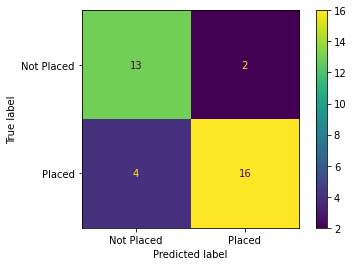

In [34]:
print("LogisticRegression")
plot_confusion_matrix(best_results['LogisticRegression'][1], X_test_label, y_test, display_labels=['Not Placed','Placed'])

KNeighborsClassifier


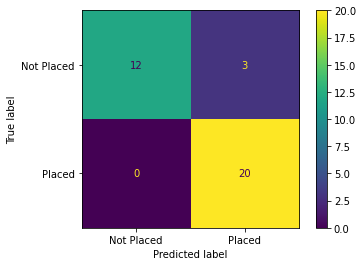

In [35]:
print("KNeighborsClassifier")
plot_confusion_matrix(best_results['KNeighborsClassifier'][1], X_test_label, y_test, display_labels=['Not Placed','Placed'])

Si può vedere come i risultati non risultano troppo sbilanciati. Vengono predetti più `Placed` semplicemente perché è il più popoloso nel dataset. Infatti il maggior numero di errori vengono fatti sui `Not Placed` proprio per questo motivo

`KNeighborsClassifier` con `n_neighbors=11` ha le performance migliori in quanto ha il valore di `Accuracy` più alto e, osservando la matrice di confusione, si osserva che rileva un numero di Falsi Negativi nettamente inferiore alla LogisticRegression (0) e un numero Falsi Positivi di una sola unità maggiore (3). Variando lo split del dataset (ad esempio non fissando un `random_state`) o variando il numero di elementi potrebbero esserci delle variazioni

# Accuracy KNeighborsClassifier

In [36]:
best = "KNeighborsClassifier"
# print(f"Il classificatore scelto è {best}")
y_test_pred = best_results[best][1].predict(X_test)
_, test_accuracy = get_train_test_accuracy(y_train, y_train_pred, y_test, y_test_pred)
# print(f"Accuracy = {test_accuracy}%")
print(f"{test_accuracy}%")

91.43%
